In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


616

In [5]:
max_temp = []
temp = []
humid = []
cloud = []
wind = []
country = []
date = []
lati = []
long = []
city_list = []

In [6]:
# create a params dict that will be updated with new city each iteration
unit = "imperial"
city_count = 0
#params = {"appid": api_key,
         #"units": unit}

# Loop through the cities_df and run a search to complete the dataframe
for city in cities:
    baseurl = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={unit}&'

#     lat = row['Latitude']
#     lon = row['Longitude']
    
    # update address key value
#     params['lat'] = f"{lat}"
#     params['lon'] = f"{lon}"
    
    #create city counter
    city_count = city_count + 1
    # make request
    query_url = f'{baseurl}q={city}'    
    
    response = requests.get(query_url)
    
    # convert to json
    response = response.json()
    
    #populate dataframe with missing details
#     cities_df.loc[index, "Temperature (F)"] = response["main"]["temp"]
#     cities_df.loc[index, "Humidity (%)"] = response["main"]["humidity"]
#     cities_df.loc[index, "Cloudiness (%)"] = response["clouds"]["all"]
#     cities_df.loc[index, "Wind Speed (mph)"] = response["wind"]["speed"]
    try:
        print(f'Processing Record {city_count} | {city}')
        temp.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        max_temp.append(response["main"]["temp_max"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lati.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        city_list.append(response['name'])
        
    except KeyError:
        print(f'{city} information not found...skipping')
    

Processing Record 1 | arraial do cabo
Processing Record 2 | mahebourg
Processing Record 3 | trelew
Processing Record 4 | mar del plata
Processing Record 5 | touros
Processing Record 6 | busselton
Processing Record 7 | roald
Processing Record 8 | nouadhibou
Processing Record 9 | zheleznodorozhnyy
Processing Record 10 | rikitea
Processing Record 11 | salento
Processing Record 12 | port alfred
Processing Record 13 | solsvik
solsvik information not found...skipping
Processing Record 14 | saskylakh
Processing Record 15 | chateaubelair
Processing Record 16 | collierville
Processing Record 17 | saint-philippe
Processing Record 18 | progreso
Processing Record 19 | ukiah
Processing Record 20 | naron
Processing Record 21 | samusu
samusu information not found...skipping
Processing Record 22 | lufilufi
Processing Record 23 | airai
Processing Record 24 | alexandria
Processing Record 25 | kropotkin
Processing Record 26 | yellowknife
Processing Record 27 | boueni
Processing Record 28 | caravelas
Proc

Processing Record 219 | la libertad
Processing Record 220 | the pas
Processing Record 221 | umzimvubu
umzimvubu information not found...skipping
Processing Record 222 | husavik
Processing Record 223 | kruisfontein
Processing Record 224 | grand river south east
grand river south east information not found...skipping
Processing Record 225 | bengkulu
Processing Record 226 | pahrump
Processing Record 227 | kaitangata
Processing Record 228 | fethiye
Processing Record 229 | hami
Processing Record 230 | westport
Processing Record 231 | mnogovershinnyy
Processing Record 232 | aksu
Processing Record 233 | guerrero negro
Processing Record 234 | telde
Processing Record 235 | shimanovsk
Processing Record 236 | nemuro
Processing Record 237 | oisterwijk
Processing Record 238 | golspie
Processing Record 239 | furth im wald
Processing Record 240 | macaboboni
macaboboni information not found...skipping
Processing Record 241 | hobyo
Processing Record 242 | half moon bay
Processing Record 243 | verkhnevi

Processing Record 443 | kalmunai
Processing Record 444 | mglin
Processing Record 445 | belmonte
Processing Record 446 | wagar
Processing Record 447 | tutoia
Processing Record 448 | alabaster
Processing Record 449 | aljezur
Processing Record 450 | mizpe ramon
mizpe ramon information not found...skipping
Processing Record 451 | chicama
Processing Record 452 | samalaeulu
samalaeulu information not found...skipping
Processing Record 453 | yulara
Processing Record 454 | sayanskiy
sayanskiy information not found...skipping
Processing Record 455 | comodoro rivadavia
Processing Record 456 | kuytun
Processing Record 457 | hope
Processing Record 458 | totness
Processing Record 459 | omsukchan
Processing Record 460 | lang son
Processing Record 461 | muros
Processing Record 462 | moron
Processing Record 463 | minamata
Processing Record 464 | porto murtinho
Processing Record 465 | kovernino
Processing Record 466 | waingapu
Processing Record 467 | huizhou
Processing Record 468 | mbandaka
Processing 

In [7]:
len(cities)
len(lati)

562

In [48]:
# Visualize to confirm lat lng appear
cities_df = pd.DataFrame({
    "City": city_list,
    "Latitude": lati,
    "Longitude": long,
    "Max Temp": max_temp,
    "Humidity": humid,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date" : date
})
cities_df.head()
cities_df.to_csv(output_data_file)

In [23]:
#remove entryes with humidity over 100%
clean_city_df = cities_df[cities_df["Humidity"] < 100]
clean_city_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,77.00,78,0,16.11,BR,1611787646
1,Mahébourg,-20.4081,57.7000,73.40,88,20,8.05,MU,1611787758
2,Trelew,-43.2490,-65.3051,68.22,33,83,18.03,AR,1611787539
3,Mar del Plata,-38.0023,-57.5575,68.00,59,0,11.50,AR,1611787499
4,Touros,-5.1989,-35.4608,80.60,74,20,11.50,BR,1611787174


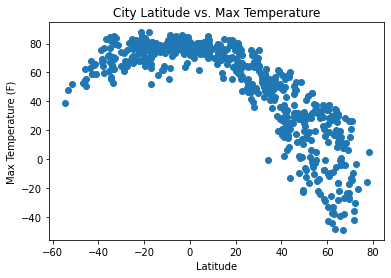

In [53]:
#create scatter plot for latitude vs temp
plt.scatter(lati,max_temp)
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('output_data/fig1.png')
plt.show()


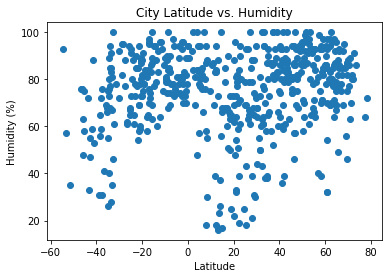

In [54]:
#create scatter plot for latitude vs humidity
plt.scatter(lati, humid)
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('output_data/fig2.png')
plt.show()


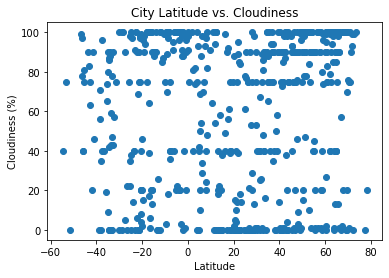

In [55]:
#create scatter plot for latitude vs cloudiness
plt.scatter(lati, cloud)
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('output_data/fig3.png')
plt.show()


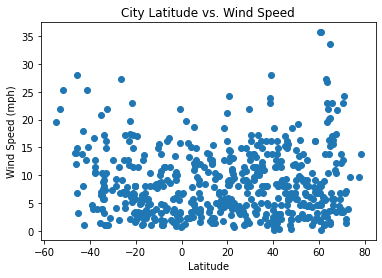

In [56]:
#create scatter plot for latitude vs wind speed
plt.scatter(lati, wind)
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('output_data/fig4.png')
plt.show()


In [19]:
#obtain northern hemisphere data using https://stackoverflow.com/questions/34243194/filter-rows-of-pandas-dataframe-whose-values-are-lower-than-0
north_df = cities_df[cities_df["Latitude"] > 0]
north_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
6,Roald,62.5833,6.1333,30.2,100,90,13.80,NO,1611787758
7,Nouadhibou,20.9310,-17.0347,68.0,73,0,9.22,MR,1611787759
8,Zheleznodorozhnyy,55.7503,38.0042,32.0,93,0,4.47,RU,1611787759
10,Salento,4.6375,-75.5703,78.8,57,40,3.44,CO,1611787759
12,Saskylakh,71.9167,114.0833,-41.6,80,93,1.50,RU,1611787759


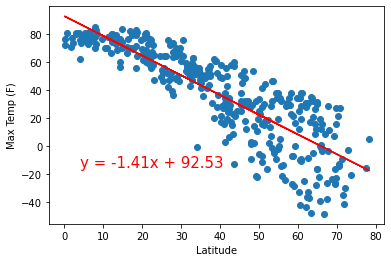

The r-value is -0.847201363486584


In [57]:
#linear regression for max temp and latitude for northern hemisphere
x_values = north_df['Latitude']
y_values = north_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('output_data/fig5.png')
plt.show()
print(f'The r-value is {rvalue}')

In [24]:
#obtain southern hemisphere data
south_df = cities_df[cities_df["Latitude"] < 0]
south_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arraial do Cabo,-22.9661,-42.0278,77.00,78,0,16.11,BR,1611787646
1,Mahébourg,-20.4081,57.7000,73.40,88,20,8.05,MU,1611787758
2,Trelew,-43.2490,-65.3051,68.22,33,83,18.03,AR,1611787539
3,Mar del Plata,-38.0023,-57.5575,68.00,59,0,11.50,AR,1611787499
4,Touros,-5.1989,-35.4608,80.60,74,20,11.50,BR,1611787174
...,...,...,...,...,...,...,...,...,...
556,Isangel,-19.5500,169.2667,83.68,75,96,17.02,VU,1611787858
557,Amahai,-3.3333,128.9167,86.00,81,100,4.00,ID,1611787858
558,Voh,-20.9667,164.7000,84.99,59,97,6.73,NC,1611787858
559,Mackay,-21.1500,149.2000,82.00,78,75,14.97,AU,1611787858


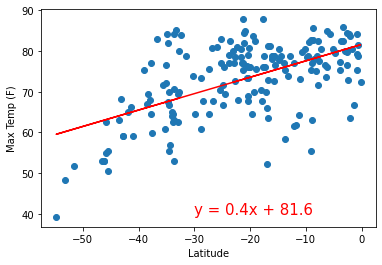

The r-value is 0.5771373285794654


In [58]:
#linear regression for max temp and latitude for southern hemisphere
x_values = south_df['Latitude']
y_values = south_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('output_data/fig6.png')
plt.show()
print(f'The r-value is {rvalue}')

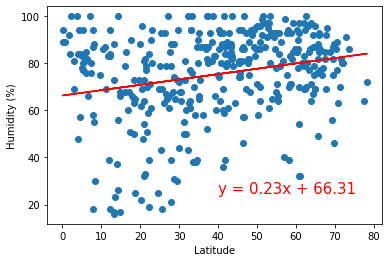

The r-value is 0.24033355871966822


In [59]:
#linear regression for humidity and latitude for northern hemisphere
x_values = north_df['Latitude']
y_values = north_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/fig7.png')
plt.show()
print(f'The r-value is {rvalue}')

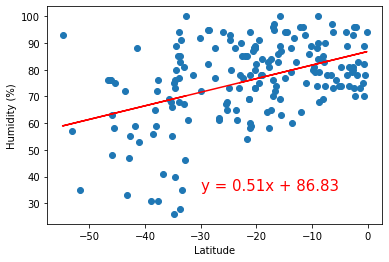

The r-value is 0.43995581045693366


In [60]:
#linear regression for humidity and latitude for southern hemisphere
x_values = south_df['Latitude']
y_values = south_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/fig8.png')
plt.show()
print(f'The r-value is {rvalue}')

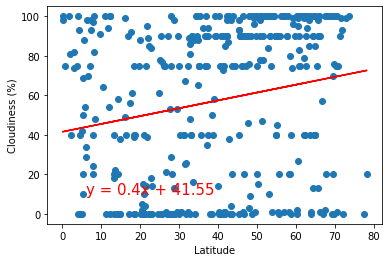

The r-value is 0.20201077355067515


In [61]:
#linear regression for cloudiness and latitude for northern hemisphere
x_values = north_df['Latitude']
y_values = north_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/fig9.png')
plt.show()
print(f'The r-value is {rvalue}')

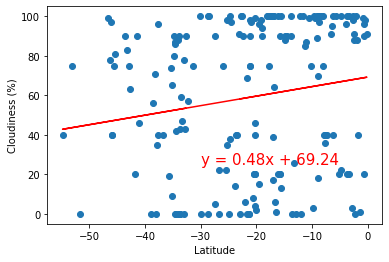

The r-value is 0.16677231934153047


In [62]:
#linear regression for cloudiness and latitude for southern hemisphere
x_values = south_df['Latitude']
y_values = south_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/fig10.png')
plt.show()
print(f'The r-value is {rvalue}')

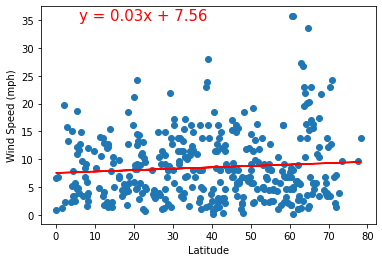

The r-value is 0.08193275002514545


In [63]:
#linear regression for wind speed and latitude for northern hemisphere
x_values = north_df['Latitude']
y_values = north_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,35),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/fig11.png')
plt.show()
print(f'The r-value is {rvalue}')

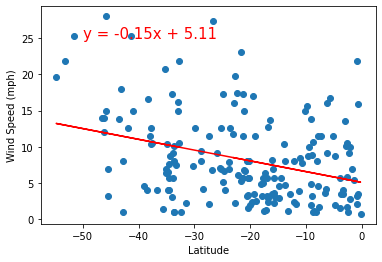

The r-value is -0.33160647000488136


In [64]:
#linear regression for Wind Speed and latitude for southern hemisphere
x_values = south_df['Latitude']
y_values = south_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/fig12.png')
plt.show()
print(f'The r-value is {rvalue}')